In [1]:
import subprocess
import numpy as np
import healpy as hp
import pickle
from random import randint
import joblib
import sklearn
import sys
import astropy
import h5py
import importlib
import os

from astropy.table import Table
from astropy.io import fits
import matplotlib.pyplot as plt

In [2]:
sys.path.append('/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/methods_code_Nresol/')
from utils_circpatch import *
sys.path.append('/n/holylfs05/LABS/finkbeiner_lab/Everyone/highlat/utils/')
import testbeds
import vis_utils
nmdir='../notebooks_main1/'

In [3]:
sys.path.append('../')
import acc_evaluation_lib

### Rerun at FWHM=6.1'

In [4]:
fskdir = '../notebooks_main1/fullsky_runs/'
fits61 = hp.fitsfunc.read_map(fskdir+'fits_outputs/recon_fw6-1_final_mult.fits', field=None, h=True)
reconzpt61, var61_corr = fits61[0][1], fits61[0][3]

In [5]:
fptpixels = np.arange(hp.nside2npix(2048))
fptpixels = fptpixels[reconzpt61!=hp.UNSEEN]

In [6]:
maps = [reconzpt61]
names = ['FWHM6-1']
smooths=[30]
rots=[0]
maskingname='NGC'
savename='runs/2_6/accdir/11-17_final_fwhm6-1'
save_smoothed=False
save_acc_intgn=True
error_args = {'rot_angles': np.linspace(30, 300, 100), 'errortype':'Rot', 'rot_batches': 10}

In [7]:
accs_all = acc_evaluation_lib.preproc_get_acc_intgn(maps, names, fptpixels, maskingname, smooths, savename, error_args, save_smoothed = save_smoothed, save_acc_intgn=save_acc_intgn)

arcmin: 30
ang 0
ang 30.0
ang 32.72727272727273
ang 35.45454545454545
ang 38.18181818181818
ang 40.90909090909091
ang 43.63636363636363
ang 46.36363636363636
ang 49.09090909090909
ang 51.81818181818181
ang 54.54545454545455
ang 57.272727272727266
ang 60.0
ang 62.72727272727273
ang 65.45454545454545
ang 68.18181818181819
ang 70.9090909090909
ang 73.63636363636363
ang 76.36363636363636
ang 79.0909090909091
ang 81.81818181818181
ang 84.54545454545453
ang 87.27272727272727
ang 90.0
ang 92.72727272727272
ang 95.45454545454545
ang 98.18181818181817
ang 100.9090909090909
ang 103.63636363636363
ang 106.36363636363636
ang 109.09090909090908
ang 111.81818181818181
ang 114.54545454545453
ang 117.27272727272727
ang 120.0
ang 122.72727272727272
ang 125.45454545454545
ang 128.1818181818182
ang 130.9090909090909
ang 133.63636363636363
ang 136.36363636363637
ang 139.09090909090907
ang 141.8181818181818
ang 144.54545454545453
ang 147.27272727272725
ang 150.0
ang 152.72727272727272
ang 155.4545454545454

### Rerun at FWHM=15'

In [4]:
fskdir = '../notebooks_main1/fullsky_runs/'
fits15 = hp.fitsfunc.read_map(fskdir+'fits_outputs/recon_fw15_final_mult.fits', field=None, h=True)
reconzpt15, var15_corr = fits15[0][1], fits15[0][3]

In [5]:
fptpixels = np.arange(hp.nside2npix(2048))
fptpixels = fptpixels[reconzpt15!=hp.UNSEEN]

In [6]:
maps = [reconzpt15]
names = ['FWHM15']
smooths=[30]
rots=[0]
maskingname='NGC'
savename='runs/2_6/accdir/11-17_final_fwhm15'
save_smoothed=False
save_acc_intgn=True
error_args = {'rot_angles': np.linspace(30, 300, 100), 'errortype':'Rot', 'rot_batches': 10}

In [7]:
accs_all = acc_evaluation_lib.preproc_get_acc_intgn(maps, names, fptpixels, 
                        maskingname, smooths, savename, error_args, save_smoothed = save_smoothed, save_acc_intgn=save_acc_intgn)

arcmin: 30
ang 0
ang 30.0
ang 32.72727272727273
ang 35.45454545454545
ang 38.18181818181818
ang 40.90909090909091
ang 43.63636363636363
ang 46.36363636363636
ang 49.09090909090909
ang 51.81818181818181
ang 54.54545454545455
ang 57.272727272727266
ang 60.0
ang 62.72727272727273
ang 65.45454545454545
ang 68.18181818181819
ang 70.9090909090909
ang 73.63636363636363
ang 76.36363636363636
ang 79.0909090909091
ang 81.81818181818181
ang 84.54545454545453
ang 87.27272727272727
ang 90.0
ang 92.72727272727272
ang 95.45454545454545
ang 98.18181818181817
ang 100.9090909090909
ang 103.63636363636363
ang 106.36363636363636
ang 109.09090909090908
ang 111.81818181818181
ang 114.54545454545453
ang 117.27272727272727
ang 120.0
ang 122.72727272727272
ang 125.45454545454545
ang 128.1818181818182
ang 130.9090909090909
ang 133.63636363636363
ang 136.36363636363637
ang 139.09090909090907
ang 141.8181818181818
ang 144.54545454545453
ang 147.27272727272725
ang 150.0
ang 152.72727272727272
ang 155.4545454545454

### Bayestar17

In [4]:
b17map, b17sigmamap = vis_utils.get_bayestar2017_map(return_sigma=True)

Multiplying by the EBV conversion factor of 0.856 derived from E(g-r) relation (Eq1)


In [5]:
fptpixels = np.arange(hp.nside2npix(2048))
fptpixels = fptpixels[b17map!=np.nan]

In [6]:
maps = [b17map]
names = ['B17']
smooths=[30]
rots=[0]
maskingname='NGC'
savename='runs/2_6/accdir/final_bayestar2017'
save_smoothed=False
save_acc_intgn=True
error_args = {'rot_angles': np.linspace(30, 300, 100), 'errortype':'Rot', 'rot_batches': 10}

In [7]:
accs_all = acc_evaluation_lib.preproc_get_acc_intgn(maps, names, fptpixels, maskingname, 
                        smooths, savename, error_args, save_smoothed = save_smoothed, save_acc_intgn=save_acc_intgn)

arcmin: 30
ang 0
ang 30.0
ang 32.72727272727273
ang 35.45454545454545
ang 38.18181818181818
ang 40.90909090909091
ang 43.63636363636363
ang 46.36363636363636
ang 49.09090909090909
ang 51.81818181818181
ang 54.54545454545455
ang 57.272727272727266
ang 60.0
ang 62.72727272727273
ang 65.45454545454545
ang 68.18181818181819
ang 70.9090909090909
ang 73.63636363636363
ang 76.36363636363636
ang 79.0909090909091
ang 81.81818181818181
ang 84.54545454545453
ang 87.27272727272727
ang 90.0
ang 92.72727272727272
ang 95.45454545454545
ang 98.18181818181817
ang 100.9090909090909
ang 103.63636363636363
ang 106.36363636363636
ang 109.09090909090908
ang 111.81818181818181
ang 114.54545454545453
ang 117.27272727272727
ang 120.0
ang 122.72727272727272
ang 125.45454545454545
ang 128.1818181818182
ang 130.9090909090909
ang 133.63636363636363
ang 136.36363636363637
ang 139.09090909090907
ang 141.8181818181818
ang 144.54545454545453
ang 147.27272727272725
ang 150.0
ang 152.72727272727272
ang 155.4545454545454

### Bayestar19

In [4]:
b19map = vis_utils.get_bayestar2019_map()

linux
Multiplying by the EBV conversion factor of 0.856 derived from E(g-r) relation (Eq1)


In [5]:
fptpixels = np.arange(hp.nside2npix(2048))
fptpixels = fptpixels[b19map!=np.nan]

In [6]:
maps = [b19map]
names = ['B19']
smooths=[30]
rots=[0]
maskingname='NGC'
savename='runs/2_6/accdir/final_bayestar2019'
save_smoothed=False
save_acc_intgn=True
error_args = {'rot_angles': np.linspace(30, 300, 100), 'errortype':'Rot', 'rot_batches': 10}

In [7]:
accs_all = acc_evaluation_lib.preproc_get_acc_intgn(maps, names, fptpixels, maskingname, 
                        smooths, savename, error_args, save_smoothed = save_smoothed, save_acc_intgn=save_acc_intgn)

arcmin: 30
ang 0
ang 30.0
ang 32.72727272727273
ang 35.45454545454545
ang 38.18181818181818
ang 40.90909090909091
ang 43.63636363636363
ang 46.36363636363636
ang 49.09090909090909
ang 51.81818181818181
ang 54.54545454545455
ang 57.272727272727266
ang 60.0
ang 62.72727272727273
ang 65.45454545454545
ang 68.18181818181819
ang 70.9090909090909
ang 73.63636363636363
ang 76.36363636363636
ang 79.0909090909091
ang 81.81818181818181
ang 84.54545454545453
ang 87.27272727272727
ang 90.0
ang 92.72727272727272
ang 95.45454545454545
ang 98.18181818181817
ang 100.9090909090909
ang 103.63636363636363
ang 106.36363636363636
ang 109.09090909090908
ang 111.81818181818181
ang 114.54545454545453
ang 117.27272727272727
ang 120.0
ang 122.72727272727272
ang 125.45454545454545
ang 128.1818181818182
ang 130.9090909090909
ang 133.63636363636363
ang 136.36363636363637
ang 139.09090909090907
ang 141.8181818181818
ang 144.54545454545453
ang 147.27272727272725
ang 150.0
ang 152.72727272727272
ang 155.4545454545454

In [9]:
plt.rcParams.update({'font.family':'serif', 'font.size': 16})

In [9]:
import vis_utils

In [10]:
acccomp = pickle.load(open('intermed/12_11/comp_ens_acc_intgn.pkl', 'rb'))
accsref = acccomp['accs_all']

In [11]:
accs61dict = pickle.load(open('runs/2_6/accdir/11-17_final_fwhm6-1_acc_intgn.pkl', 'rb'))
accs61 = accs61dict['accs_all']

FWHM6-1_sm30


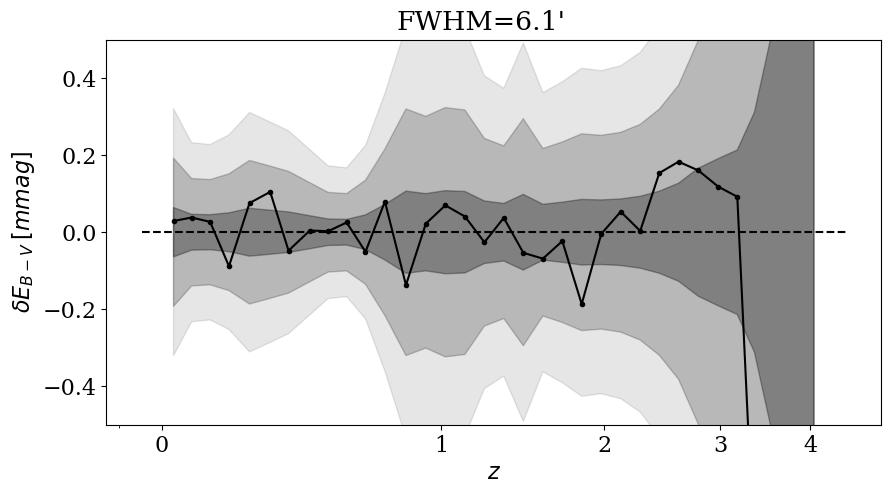

In [13]:
vis_utils.plot_acc_comparison(accsref, [accs61], cols=['b']*4+['k'], ref_choice=[12], sigcontours=[1, 3, 5], 
                        no_legend=True, title='FWHM=6.1\'', savefig='../plots/accpanel/11-17_recon_6-1_final.png')

FWHM15_sm30


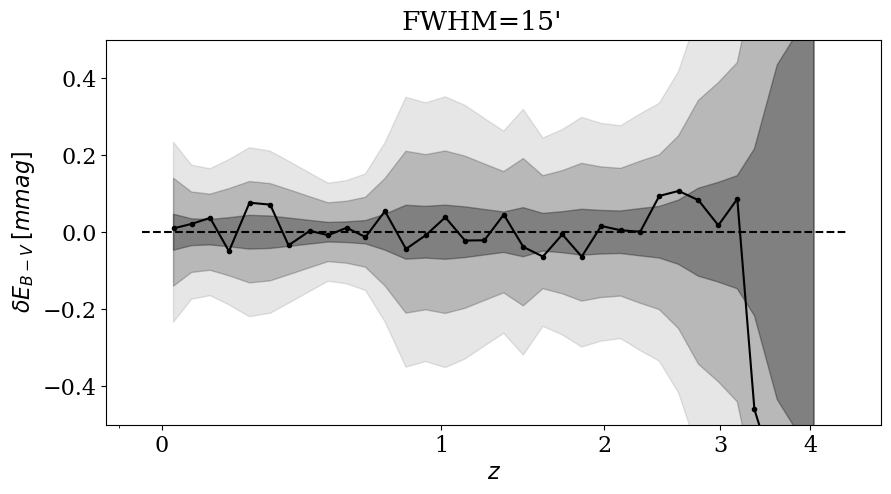

In [14]:
accs15dict = pickle.load(open('runs/2_6/accdir/11-17_final_fwhm15_acc_intgn.pkl', 'rb'))
accs15 = accs15dict['accs_all']

vis_utils.plot_acc_comparison(accsref, [accs15], cols=['b']*4+['k'], ref_choice=[12], sigcontours=[1, 3, 5], 
            no_legend=True, title='FWHM=15\'', savefig='../plots/accpanel/11-17_recon_15_final.png')

B17_sm30


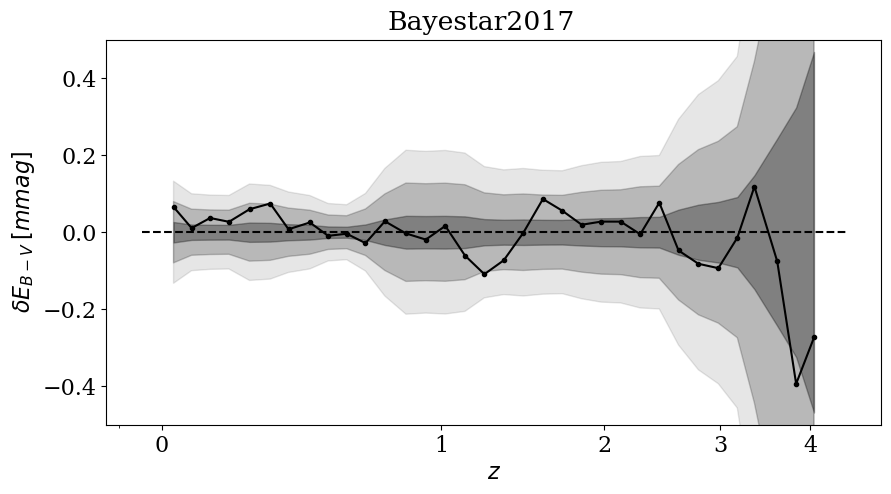

In [15]:
b17dict = pickle.load(open('runs/2_6/accdir/final_bayestar2017_acc_intgn.pkl', 'rb'))
b17 = b17dict['accs_all']

vis_utils.plot_acc_comparison(accsref, [b17], cols=['b']*4+['k'], ref_choice=[12], sigcontours=[1, 3, 5], 
            no_legend=True, title='Bayestar2017', savefig='../plots/accpanel/11-17_b17_final.png')

B19_sm30


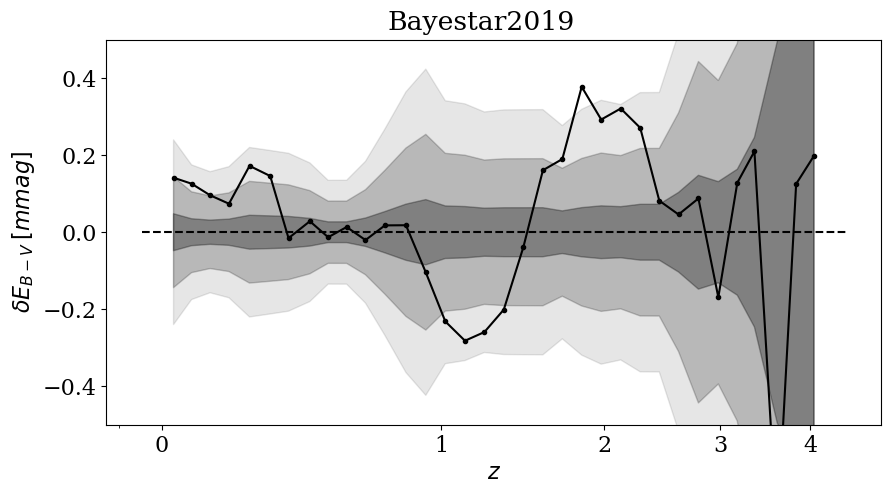

In [16]:
b19dict = pickle.load(open('runs/2_6/accdir/final_bayestar2019_acc_intgn.pkl', 'rb'))
b19 = b19dict['accs_all']

vis_utils.plot_acc_comparison(accsref, [b19], cols=['b']*4+['k'], ref_choice=[12], sigcontours=[1, 3, 5], 
            no_legend=True, title='Bayestar2019', savefig='../plots/accpanel/11-17_b19_final.png')

### Adding Plots for SFD and GNILC here
Originally in 3_8_PaperPlots_ACC.ipynb

In [4]:
#recomputing gnilc to recheck
gnilcmap = vis_utils.get_gnilc_map()

Multiplying by the EBV conversion factor of 1.0, the slope of SFD*0.86 with GNILC at pixhigh


In [5]:
maps = [gnilcmap]
names = ['GNILC']
smooths=[30]
rots=[0]
maskingname='NGC'
savename='runs/2_6/accdir/final_gnilc'
save_smoothed=False
save_acc_intgn=True
error_args = {'rot_angles': np.linspace(30, 300, 100), 'errortype':'Rot', 'rot_batches': 10}

In [6]:
fptpixels = np.arange(hp.nside2npix(2048))
fptpixels = fptpixels[gnilcmap!=np.nan]

In [ ]:
accs_all = acc_evaluation_lib.preproc_get_acc_intgn(maps, names, fptpixels, maskingname, 
                smooths, savename, error_args, save_smoothed = save_smoothed, save_acc_intgn=save_acc_intgn)

arcmin: 30


GNILC_sm30


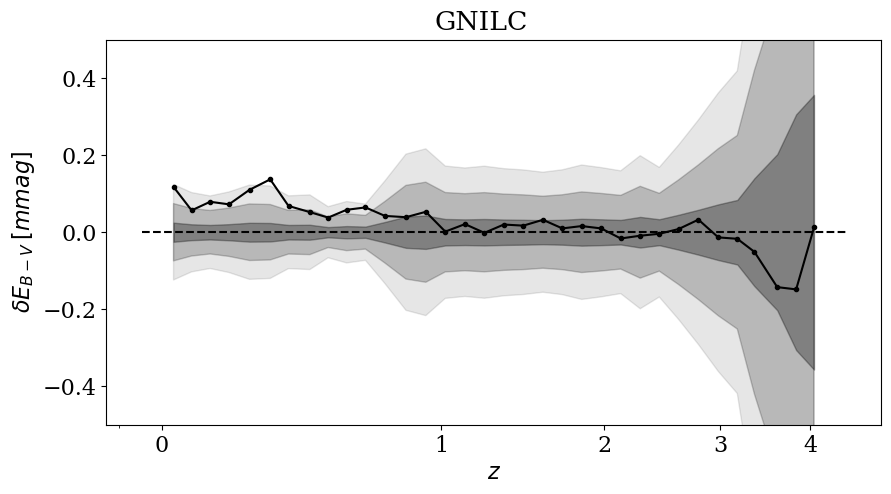

In [12]:
gnilcdict = pickle.load(open('runs/2_6/accdir/final_gnilc_acc_intgn.pkl', 'rb'))
gnilc = gnilcdict['accs_all']

vis_utils.plot_acc_comparison(accsref, [gnilc], cols=['b']*4+['k'], ref_choice=[12], sigcontours=[1, 3, 5], 
            no_legend=True, title='GNILC', savefig='../plots/accpanel/11-17_gnilc_final.png')

In [13]:
accsfddict = pickle.load(open('runs/2_6/accdir/sfd_corr_acc_intgn.pkl', 'rb'))
accsfd = accsfddict['accs_all']

SFD_sm30


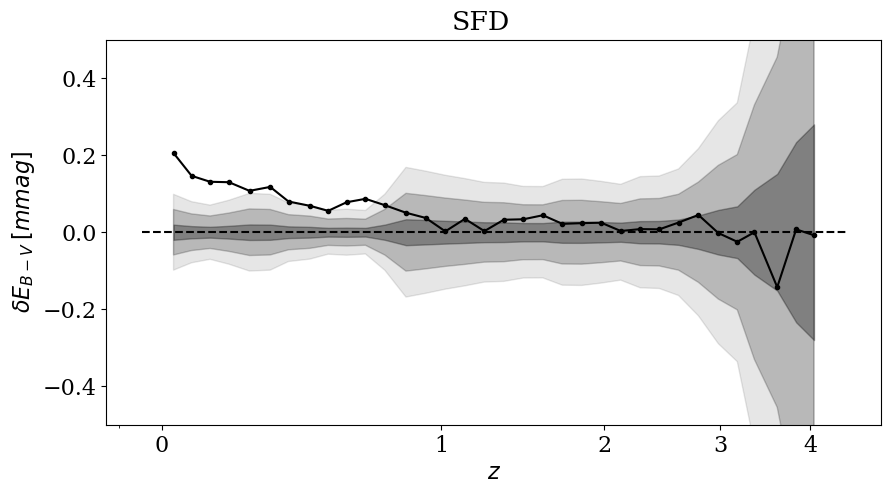

In [14]:
plt.rcParams.update({'font.family':'serif', 'font.size': 16})
vis_utils.plot_acc_comparison(accsref, [accsfd], cols=['b']*4+['k'], ref_choice=[], 
                      sigcontours=[1, 3, 5], no_legend=True, savefig='../plots/accpanel/sfd_recheck.png', title='SFD')